# Exploring PyCaret

 - an open source Python library that helps you to become a **Super Saiyan Data scientist** very quickly and efficiently!


![](https://pycaret.org/wp-content/uploads/2020/03/Divi93_43.png) ![super saiyan](https://qph.fs.quoracdn.net/main-qimg-f3e876daaaf9277783ed6c298c153e02)

* PyCaret is an open source, low-code machine learning library in Python that allows you to go from preparing your data to deploying your model within seconds in your choice of notebook environment.
* The three main reasons why PyCaret is an easy way to become a **super saiyan** data scientist is:
    * It is simple and easy to use
    * It makes your more productive
    * It is business ready solution
* It is a Python wrapper around several machine learning libraries and frameworks such as scikit-learn, XGBoost, LightGBM and many more. 


* This notebook contains a simple classification problem and a simple regression problem which I used to explore PyCaret library.

## Table of contents:
1. [Classfication](#clf)
2. [Regression](#reg)

# 1. Classification <a id="clf"></a>

* The dataset I am using for exploring PyCaret on a classification problem is [Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
* The datasets consists of several medical predictor variables and one target variable.
* Predictor variable in the dataset is **Outcome** which is either 0 or 1 which represents patient has no-diabetes and diabetes, respectively.

## Install PyCaret

In [1]:
!pip install pycaret

     |████████████████████████████████| 188 kB 6.2 MB/s eta 0:00:01
     |████████████████████████████████| 7.3 MB 8.4 MB/s eta 0:00:01
     |████████████████████████████████| 259 kB 44.2 MB/s eta 0:00:01
     |████████████████████████████████| 142.8 MB 35 kB/s s eta 0:00:01
     |████████████████████████████████| 60 kB 4.7 MB/s  eta 0:00:01
     |████████████████████████████████| 378 kB 45.9 MB/s eta 0:00:01
     |████████████████████████████████| 93 kB 1.2 MB/s  eta 0:00:01
     |████████████████████████████████| 127 kB 47.9 MB/s eta 0:00:01
     |████████████████████████████████| 63.9 MB 46.1 MB/s eta 0:00:01
     |████████████████████████████████| 7.0 MB 39.2 MB/s eta 0:00:01
     |████████████████████████████████| 81 kB 5.8 MB/s  eta 0:00:01
     |████████████████████████████████| 1.3 MB 37.3 MB/s eta 0:00:01
     |████████████████████████████████| 235 kB 52.1 MB/s eta 0:00:01


     |████████████████████████████████| 2.1 MB 40.1 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 2.1 MB/s  eta 0:00:01
     |████████████████████████████████| 6.4 MB 36.6 MB/s eta 0:00:01


  Created wheel for shap: filename=shap-0.32.1-cp37-cp37m-linux_x86_64.whl size=381823 sha256=f5db3b9b5ba964b431b34534ff8f9e848270e4efc8d988272226c8689616d210
  Stored in directory: /root/.cache/pip/wheels/fb/73/18/f32e1b595c0bb416c036ac48442c8f74c37a2d80ee5d3d4f60
  Created wheel for pyod: filename=pyod-0.8.1-py3-none-any.whl size=105651 sha256=4402ab595d06e31e70f21d016a89e91006130d809cc01c56a1de969562a5d032
  Stored in directory: /root/.cache/pip/wheels/d6/f2/24/2c050361bd259bee34bbef8047bbcd3f08085f2a8a5ed1fc85
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=145035 sha256=4d6d7441aa2dbe4ab7d4945381a411134e73203055313ed9ff323ee4204c1e5a
  Stored in directory: /root/.cache/pip/wheels/4a/c5/ea/9a3c4215fb7fbbc908a9d3646c4bd74b2960639b6883de5529
  Created wheel for cufflinks: filename=cufflinks-0.17.0-py3-none-any.whl size=67743 sha256=415b4e6afb506f0e294347690c6bc1cfe6dde0e651721099a36eb1dcc3513519
  Stored in directory: /root/.cache/pip/w

## Importing some important libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

## Importing the data

In [3]:
data = pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Splitting the data into train & test and seperate the target from test dataset
* so that the test dataset will be new to the model
* keeping the test size - 30% of the whole data

In [5]:
train, test = train_test_split(data, test_size=0.3, random_state=42, shuffle=True)

In [6]:
X_test = test.drop(['Outcome'],axis=1)
y_test = test.Outcome
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50


## Importing the whole Classification module

In [7]:
from pycaret.classification import *

## Pre-processing
* setting up my dataset

In [8]:
clf = setup(data = train, 
             target = 'Outcome',
             numeric_imputation = 'mean',
             silent = True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,5798
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(537, 9)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


## Which model is best for my data?

* Comparing the all the available models in the library based on 6 metrics
    * Accuracy
    * AUC score
    * Recall
    * Precision
    * F1 score
    * Kappa
    
* It scores the models using **Stratified Cross Validation** 

In [9]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Linear Discriminant Analysis,0.762200,0.806200,0.558200,0.713200,0.618900,0.451200
1,Ridge Classifier,0.756900,0.000000,0.550500,0.705000,0.610400,0.439000
2,Logistic Regression,0.746600,0.800600,0.543400,0.681900,0.594900,0.416400
3,CatBoost Classifier,0.744000,0.820000,0.587900,0.661800,0.616100,0.426100
4,Extreme Gradient Boosting,0.738600,0.812600,0.557700,0.651900,0.596600,0.406100
5,Ada Boost Classifier,0.736100,0.783500,0.551600,0.649000,0.590100,0.399600
6,Gradient Boosting Classifier,0.735900,0.820600,0.572500,0.637100,0.597200,0.403600
7,Random Forest Classifier,0.728000,0.751400,0.511000,0.643800,0.563900,0.371500
8,Extra Trees Classifier,0.725300,0.795100,0.504900,0.644700,0.560200,0.366400
9,K Neighbors Classifier,0.722800,0.762700,0.542900,0.614200,0.573500,0.370600


* I am taking accuracy as a metric
* But remember - AUC is better measure of classifier performance than accuracy because it does not bias on size of test or evaluation data. 
* So the model I am selecting for now is  	Linear Discriminant Analysis (the abbreviated string is **'lda'**).

## Creating the model

In [10]:
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7632,0.8615,0.5385,0.7000,0.6087,0.4430
1,0.7895,0.8492,0.5385,0.7778,0.6364,0.4950
2,0.8684,0.8338,0.7692,0.8333,0.8000,0.7022
3,0.8421,0.7662,0.6923,0.8182,0.7500,0.6358
4,0.7368,0.6935,0.4286,0.7500,0.5455,0.3791
5,0.6757,0.7788,0.4615,0.5455,0.5000,0.2625
6,0.7838,0.9103,0.4615,0.8571,0.6000,0.4695
7,0.7027,0.8205,0.5385,0.5833,0.5600,0.3361
8,0.7297,0.7821,0.4615,0.6667,0.5455,0.3621
9,0.7297,0.7660,0.6923,0.6000,0.6429,0.4272


## Tuning the model

* This function tunes the hyperparameters of a model 

In [11]:
tlda = tune_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7368,0.8492,0.6154,0.6154,0.6154,0.4154
1,0.8684,0.8738,0.6154,1.0000,0.7619,0.6780
2,0.8158,0.8492,0.6923,0.7500,0.7200,0.5831
3,0.8421,0.8154,0.6154,0.8889,0.7273,0.6213
4,0.7895,0.7500,0.5714,0.8000,0.6667,0.5190
5,0.6757,0.7660,0.3846,0.5556,0.4545,0.2345
6,0.8378,0.9359,0.6154,0.8889,0.7273,0.6172
7,0.7568,0.8526,0.6923,0.6429,0.6667,0.4756
8,0.7297,0.8205,0.4615,0.6667,0.5455,0.3621
9,0.7568,0.8173,0.6923,0.6429,0.6667,0.4756


## Plotting the learning curve

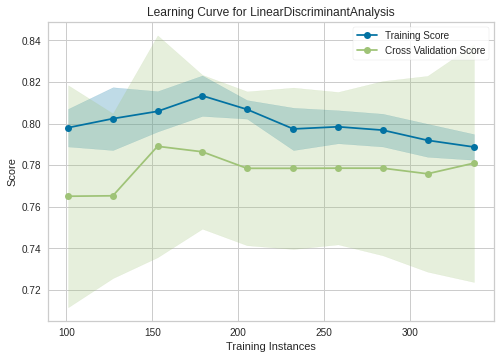

In [12]:
plot_model(estimator=tlda, plot='learning')

## Plotting the AUC curve

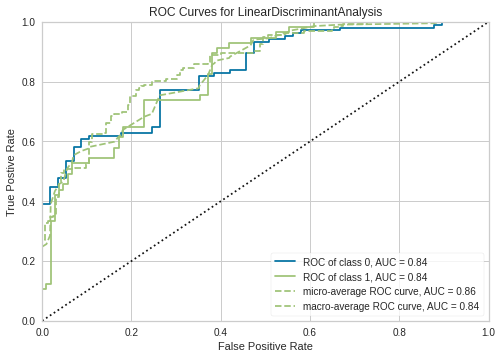

In [13]:
plot_model(estimator=tlda, plot='auc')

## Plotting the class prediction error

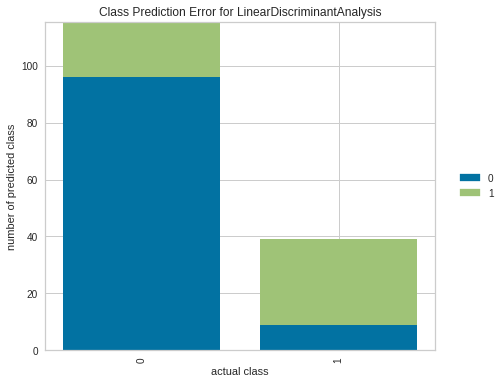

In [14]:
plot_model(estimator=tlda, plot='error')

## Evaluating the model
* This function displays a user interface for all of the available plots for a given estimator.

In [15]:
evaluate_model(tlda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Predicting the Outcome for the unseen dataset (X_test)

In [16]:
predictions = predict_model(tlda, data=X_test)
predictions.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Label,Score
0,6,98,58,33,190,34.0,0.430,43,0,0.2518
1,2,112,75,32,0,35.7,0.148,21,0,0.1802
2,2,108,64,0,0,30.8,0.158,21,0,0.1377
3,8,107,80,0,0,24.6,0.856,34,0,0.1055
4,7,136,90,0,0,29.9,0.210,50,0,0.4909


In [17]:
pred = predictions['Label']
pred.head()

0    0
1    0
2    0
3    0
4    0
Name: Label, dtype: int64

## Comparing the predicted Outcome(pred) with the original Outcome(y_test)

In [18]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test,pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,pred)))

Mean Absolute Error: 0.26406926406926406
Mean Squared Error: 0.26406926406926406
Root Mean Squared Error: 0.513876701232177


## Visualizing the confusion matrix

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,26,18,44
1,21,9,30
All,47,27,74


## Blending is easy now!

* This function creates a Majority Rule classifier for specific trained estimators passed as a list in estimator_list param.

In [20]:
et  = create_model('et');  # Extra Trees Classifier     
gb   = create_model('gbc');  # Gradient Boosting Classifier

blend = blend_models(estimator_list=[tlda,et,gb])

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7632,0.0,0.6154,0.6667,0.6400,0.4639
1,0.7895,0.0,0.5385,0.7778,0.6364,0.4950
2,0.7632,0.0,0.7692,0.6250,0.6897,0.5015
3,0.7632,0.0,0.5385,0.7000,0.6087,0.4430
4,0.7632,0.0,0.5000,0.7778,0.6087,0.4502
5,0.6757,0.0,0.3846,0.5556,0.4545,0.2345
6,0.8108,0.0,0.5385,0.8750,0.6667,0.5448
7,0.7838,0.0,0.6923,0.6923,0.6923,0.5256
8,0.7297,0.0,0.4615,0.6667,0.5455,0.3621
9,0.8378,0.0,0.6923,0.8182,0.7500,0.6312


In [21]:
predictions = predict_model(blend, data=X_test)
predictions.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Label
0,6,98,58,33,190,34.0,0.430,43,0
1,2,112,75,32,0,35.7,0.148,21,0
2,2,108,64,0,0,30.8,0.158,21,0
3,8,107,80,0,0,24.6,0.856,34,0
4,7,136,90,0,0,29.9,0.210,50,1


In [22]:
pred = predictions['Label']
pred.head()

0    0
1    0
2    0
3    0
4    1
Name: Label, dtype: int64

In [23]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test,pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,pred)))

Mean Absolute Error: 0.24675324675324675
Mean Squared Error: 0.24675324675324675
Root Mean Squared Error: 0.496742636335202


In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,27,17,44
1,19,11,30
All,46,28,74


### Isn't this very fast and a time-saver? 
![goku](https://i.pinimg.com/originals/e2/04/2d/e2042d4d876b94e729217b3fde181ca1.jpg)

### Now let's have a look into Regression

# 2. Regression <a id="reg"></a>

* The dataset I am using for exploring PyCaret on a classification problem is [Personal Medical Cost Dataset](https://www.kaggle.com/mirichoi0218/insurance).
* The objective of the dataset is to predict the charges for a patient, based on certain diagnostic measurements included in the dataset.

## Importing data

In [25]:
data2 = pd.read_csv("../input/insurance/insurance.csv")
data2.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


## Splitting the data

In [26]:
train, test = train_test_split(data2, test_size=0.3, random_state=42, shuffle=True)

In [27]:
X_test = test.drop(['charges'],axis=1)
y_test = test.charges
X_test.head()

,age,sex,bmi,children,smoker,region
764,45,female,25.175,2,no,northeast
887,36,female,30.020,0,no,northwest
890,64,female,26.885,0,yes,northwest
1293,46,male,25.745,3,no,northwest
259,19,male,31.920,0,yes,northwest


## Importing the whole Regression module

In [28]:
from pycaret.regression import *

## Preprocessing

In [29]:
reg = setup(data=train,
           target='charges',
           numeric_imputation='mean',
           categorical_features=['sex','smoker','region'],
           silent=True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,5489
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(936, 7)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


## Comparing the models

In [30]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2362.053100,19032018.987400,4284.881000,0.861700,0.412200,0.280300
1,Extreme Gradient Boosting,2380.462100,19079303.197800,4288.416600,0.861400,0.417800,0.289100
2,CatBoost Regressor,2472.292000,19891335.847500,4384.081900,0.855500,0.436700,0.298400
3,Light Gradient Boosting Machine,2627.698700,20542625.848800,4479.681100,0.851900,0.462100,0.318700
4,Random Forest,2482.608600,21377918.326000,4562.559900,0.844500,0.448600,0.310200
5,Extra Trees Regressor,2470.392900,23912514.229100,4845.897700,0.826600,0.454900,0.301000
6,AdaBoost Regressor,3681.923300,24772707.177800,4954.622700,0.821600,0.565700,0.595700
7,Lasso Least Angle Regression,4146.859800,35085226.052600,5895.248400,0.745600,0.565000,0.416200
8,Ridge Regression,4167.914000,35125488.316700,5899.270800,0.745300,0.571400,0.419400
9,Lasso Regression,4155.120100,35134546.272200,5899.587300,0.745200,0.579100,0.417000


* I am taking Extreme Gradient Boosting (**'xgboost'**)

## Creating the model

In [31]:
gb = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2182.3500,1.657605e+07,4071.3693,0.8877,0.3595,0.2903
1,2442.3967,1.784874e+07,4224.7773,0.8912,0.3649,0.2821
2,2785.1114,2.590501e+07,5089.6965,0.7606,0.4559,0.2913
3,2079.8316,1.693427e+07,4115.1270,0.8770,0.3930,0.2294
4,2816.9626,3.156907e+07,5618.6357,0.7535,0.4802,0.2675
5,2268.5382,1.624003e+07,4029.8924,0.8732,0.4920,0.2628
6,2783.5724,2.395615e+07,4894.5024,0.8654,0.4405,0.3404
7,1591.4181,5.509639e+06,2347.2620,0.9563,0.3373,0.2828
8,2211.0775,1.865116e+07,4318.6984,0.8630,0.3892,0.2717
9,2459.2729,1.713007e+07,4138.8489,0.8889,0.4092,0.2847


## Tuning the model

In [32]:
tgb = tune_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2043.8174,1.543732e+07,3929.0356,0.8955,0.3453,0.2343
1,3107.3739,2.527823e+07,5027.7461,0.8459,0.4306,0.2864
2,3049.8495,2.746381e+07,5240.5921,0.7462,0.5602,0.2900
3,2012.8591,1.533048e+07,3915.4163,0.8886,0.3645,0.2002
4,2990.4946,3.163117e+07,5624.1591,0.7530,0.4598,0.2503
5,2580.6061,2.060050e+07,4538.7768,0.8392,0.7211,0.2813
6,3567.9777,3.439021e+07,5864.3165,0.8067,0.6061,0.3863
7,2353.4077,1.218175e+07,3490.2364,0.9034,0.3703,0.3239
8,2599.4681,2.290958e+07,4786.3954,0.8318,0.4622,0.3256
9,2793.6171,2.318099e+07,4814.6639,0.8496,0.3805,0.2460


## Predicting the Outcome for the unseen dataset (X_test)

In [33]:
predictions = predict_model(tgb, data=X_test)
predictions.head()

,age,sex,bmi,children,smoker,region,Label
0,45,female,25.175,2,no,northeast,10106.2198
1,36,female,30.020,0,no,northwest,5683.0591
2,64,female,26.885,0,yes,northwest,25019.6461
3,46,male,25.745,3,no,northwest,7902.4332
4,19,male,31.920,0,yes,northwest,34735.5933


In [34]:
pred = predictions['Label']
pred.head()

0    10106.2198
1     5683.0591
2    25019.6461
3     7902.4332
4    34735.5933
Name: Label, dtype: float64

## Comparing the real prices and predicted prices

In [35]:
y_test = y_test.reset_index()
actual = y_test.charges
df = pd.DataFrame({'Actual': actual, 'Predicted': pred})
df1 = df.head(15)

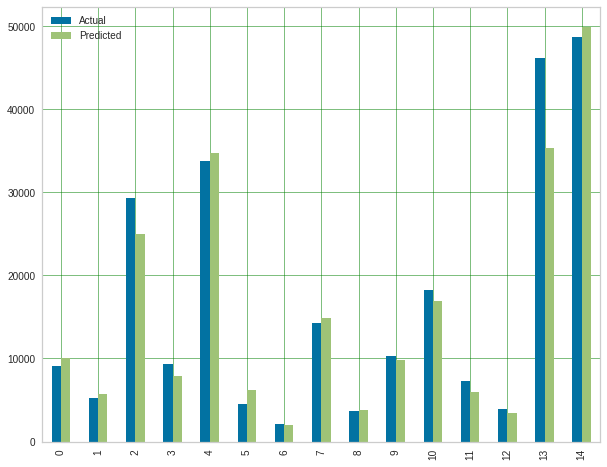

In [36]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Summary
* PyCaret is really a time-saver and a super flexible and useful library.
* You can build a machine learning model with-in seconds.
* In this notebook, I explored supervised learning problems with the help of PyCaret library.

> You can follow the PyCaret's documentations for [classification module](https://pycaret.org/classification/) and [regression mmodule](https://pycaret.org/regression/) for more detailed understanding of the library!